In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기

In [37]:
train = pd.read_csv("train_V2.csv")
test = pd.read_csv("test_V2.csv")

In [3]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


# 메모리 줄이기

In [4]:
%%time
train.info()

# Memory usages in Bytes
print("Reduced Memory size: ",train.memory_usage(index=True).sum()/(1024*1024), "MB")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [38]:
for column_name in train:
    if train[column_name].dtype=='float64':
        train[column_name] = pd.to_numeric(train[column_name], downcast= 'float')
    if train[column_name].dtype=='int64':
        train[column_name] = pd.to_numeric(train[column_name],downcast='integer')

In [6]:
%%time
train.info()

# Memory usages in Bytes
print("Reduced Memory size: ",train.memory_usage(index=True).sum()/(1024*1024), "MB")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

# 결측치 제거

In [7]:
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [39]:
train.dropna(inplace=True)

In [9]:
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# 데이터 살펴보기

In [10]:
print("Train : ", train.shape)
print("Test : ", test.shape)

Train :  (4446965, 29)
Test :  (1934174, 28)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

In [12]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [13]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.338150e-01,1.106908e+00,1.306331e+02,6.578757e-01,2.268196e-01,1.370148e+00,4.759936e+01,5.050062e+02,9.247835e-01,5.439553e-01,2.299349e+01,1.579507e+03,4.450468e+01,4.300760e+01,8.920103e+02,1.646590e-01,6.060925e+02,3.496092e-03,4.509241e+00,2.386841e-02,7.918209e-03,1.148517e+03,3.660488e+00,6.064603e+02,4.728141e-01
std,5.885731e-01,1.715794e+00,1.698870e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746293e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.147609e+01,2.587388e+02,2.382810e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.496471e+03,7.337297e-02,3.023785e+01,1.673935e-01,9.261158e-02,1.180553e+03,2.456543e+00,7.397005e+02,3.068041e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.330000e+02,2.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.910000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


# 변수 뜯어보기

### 질문 ###
1. 팀전에서는 내가 만약에 죽어도 팀 마지막 사람이 살아남으면 내가 우승인가(이거에 따라서 아래 2번 질문의 합 혹은 최대치로 계산하는 방향이 달라질듯. 예를 들어 팀의 총 킬수, 아니면 랭크포인트는 max값으로,, 이런 식으로 같이 정해봐야할듯!)
2. 매치타입별로 데이터프레임을 나눠서 다시 상관관계를 봐야할 거 같다.(팀전이라면 같은 팀 내의 힐수 합을 구해도되려나..?)
3. 근데 상관계수 높은 피처만 뽑아서 돌려보는 거 괜찮을까?(통계학적 관점에서,,)
4. 

### matchType 분할
- crash, flare 관련된 거는 기타로, 나머지는 solo, duo, squad끼리 묶고 데이터프레임 나누기 -> 못했음 -> 근데 이렇게 나눈다면 테스트데이터는 어떻게 할 것인가

### 제거사항
- walkDistace가 0인데 kills가 1이상인 경우
- matchType이 solo인데 revives 혹은 teamKills 혹은 DBNOs 혹은 assists가 1이상인 경우
- 

### 파생변수 생성
- 

###  matchhType 분할

In [40]:
train['matchType'].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [48]:
train.tail()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,d238e426f50de7,18492834ce5635,0,0,0.000000,0,0,0,74,1029,0,0,0.00,1873,3,29,28,-1,0,1292.0,0,0.000,0,0,1019.000000,3,1507,0.1786
4446962,408cdb5c46b2ac,ee854b837376d9,0,1,44.150002,0,0,0,69,0,0,0,0.00,1435,2,93,93,1501,0,0.0,0,0.000,0,0,81.699997,6,0,0.2935
4446963,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.060001,0,0,0,66,0,0,0,0.00,1321,3,28,28,1500,0,0.0,0,2.184,0,0,788.700012,4,0,0.4815
4446964,c2223f35411394,c9c701d0ad758a,0,4,180.399994,1,1,2,11,0,2,1,98.50,1373,3,26,25,1418,2,0.0,0,0.000,0,0,2748.000000,8,0,0.8000
4446965,8c74f72fedf5ff,62a16aabcc095c,0,2,268.000000,0,0,1,18,0,2,1,78.25,1766,2,98,94,1590,0,1369.0,0,0.000,0,0,1244.000000,5,0,0.5464


In [29]:
train[train['Id']== 'afff7f652dbc10']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.0,0,0,0,74,1029,0,0,0.0,1873,squad-fpp,29,28,-1,0,1292.0,0,0.0,0,0,1019.0,3,1507,0.1786


In [41]:
labelencoder = LabelEncoder()
train['matchType'] = train['matchType'].apply(
    lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x)  else 'squad' if ('squad' in x) else 'etc')

train['matchType'] = labelencoder.fit_transform(train['matchType'])
train['matchType'].value_counts()

3    2400402
0    1315970
2     720712
1       9881
Name: matchType, dtype: int64

In [42]:
train[train['Id']== 'afff7f652dbc10']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.0,0,0,0,74,1029,0,0,0.0,1873,3,29,28,-1,0,1292.0,0,0.0,0,0,1019.0,3,1507,0.1786


In [44]:
###실패 : 스쿼드인데 etc로 분류됨###

In [47]:
train.drop(['Id'], axis=1, inplace=True)

In [45]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

<AxesSubplot:>

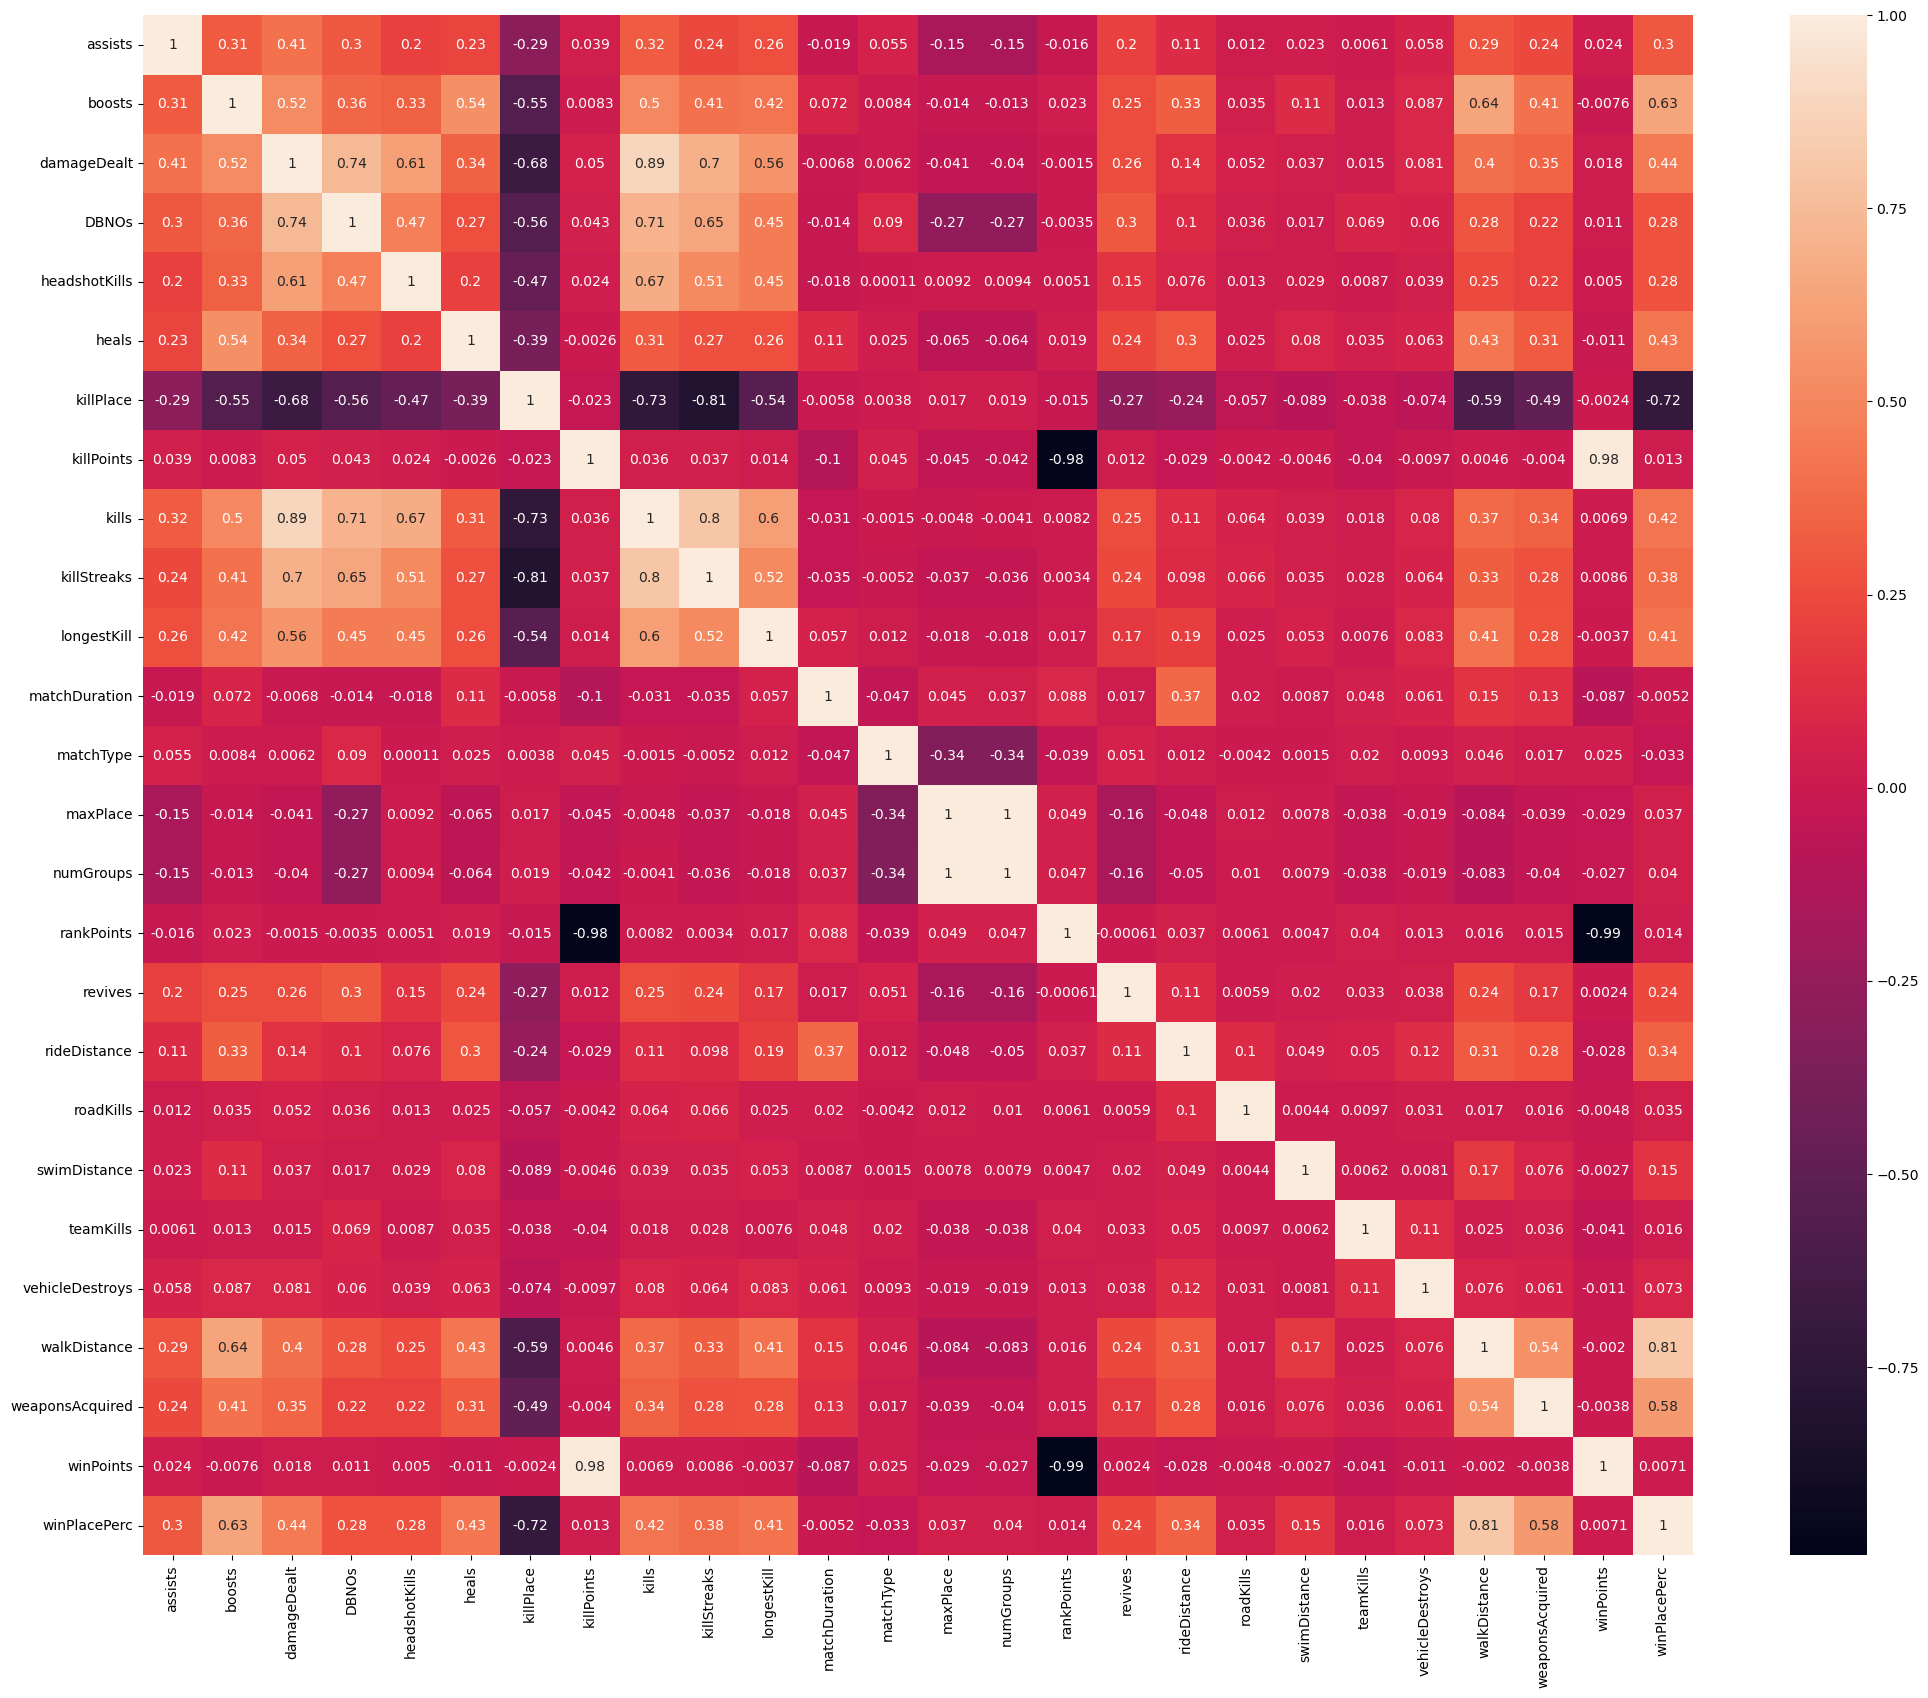

In [46]:
plt.subplots(figsize=(25, 20))
sns.heatmap(train.corr(), annot=True)

##### 
상관계수 0.4 이상인 변수들

+) boosts, damageDealt, heals, kills, vehicleDestroys, walkDistance, weaponAcquired

-) killPlace

In [50]:
## 랜덤포레스트 변수 중요도

In [49]:
def feature_importance(model):
    num_feature = model.tree_.n_features ## 피처 개수
    def node_importance(node, feature, feature_imp_val):
        left_child = model.tree_.children_left[node]
        right_child = model.tree_.children_right[node]
        
        if feature == model.tree_.feature[node]:
            total_samples = model.tree_.n_node_samples[0]
            w = model.tree_.n_node_samples[node]
            w_left = model.tree_.n_node_samples[left_child]
            w_right = model.tree_.n_node_samples[right_child]
            parent_impurity = model.tree_.impurity[node]
            left_impurity = model.tree_.impurity[left_child]
            right_impurity = model.tree_.impurity[right_child]
            feature_imp_val = (w*parent_impurity-w_left*left_impurity-w_right*right_impurity)/total_samples
        
        if left_child == right_child: ## 끝마디
            return feature_imp_val
        if left_child == -1:
            return feature_imp_val+node_importance(right_child, feature, 0)
        if right_child == -1:
            return feature_imp_val+node_importance(left_child, feature, 0)
        
        return feature_imp_val+node_importance(left_child, feature, 0)+node_importance(right_child, feature, 0)
    fi = np.array([node_importance(0, i, 0) for i in range(num_feature)])
    total_sum_fi = np.sum(fi)
    normalized_fi = fi/total_sum_fi ## 정규화
    return normalized_fi

In [51]:
train.columns

Index(['groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 28 columns):
 #   Column           Dtype  
---  ------           -----  
 0   groupId          object 
 1   matchId          object 
 2   assists          int8   
 3   boosts           int8   
 4   damageDealt      float32
 5   DBNOs            int8   
 6   headshotKills    int8   
 7   heals            int8   
 8   killPlace        int8   
 9   killPoints       int16  
 10  kills            int8   
 11  killStreaks      int8   
 12  longestKill      float32
 13  matchDuration    int16  
 14  matchType        int64  
 15  maxPlace         int8   
 16  numGroups        int8   
 17  rankPoints       int16  
 18  revives          int8   
 19  rideDistance     float32
 20  roadKills        int8   
 21  swimDistance     float32
 22  teamKills        int8   
 23  vehicleDestroys  int8   
 24  walkDistance     float32
 25  weaponsAcquired  int16  
 26  winPoints        int16  
 27  winPlacePerc

In [59]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
 

X = train[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints']].values
y = train['winPlacePerc'].values
 
## 예측 모형 모형 적합
model = DecisionTreeRegressor(max_depth=4, random_state=0).fit(X, y)

In [60]:
print('SKlearn :', model.feature_importances_)
print('구현한거 :', feature_importance(model))


SKlearn : [0.         0.         0.         0.         0.         0.
 0.16826829 0.         0.0061878  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.8255439  0.
 0.        ]
구현한거 : [0.         0.         0.         0.         0.         0.
 0.16826829 0.         0.0061878  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.8255439  0.
 0.        ]


AttributeError: 'DecisionTreeRegressor' object has no attribute 'estimators_'

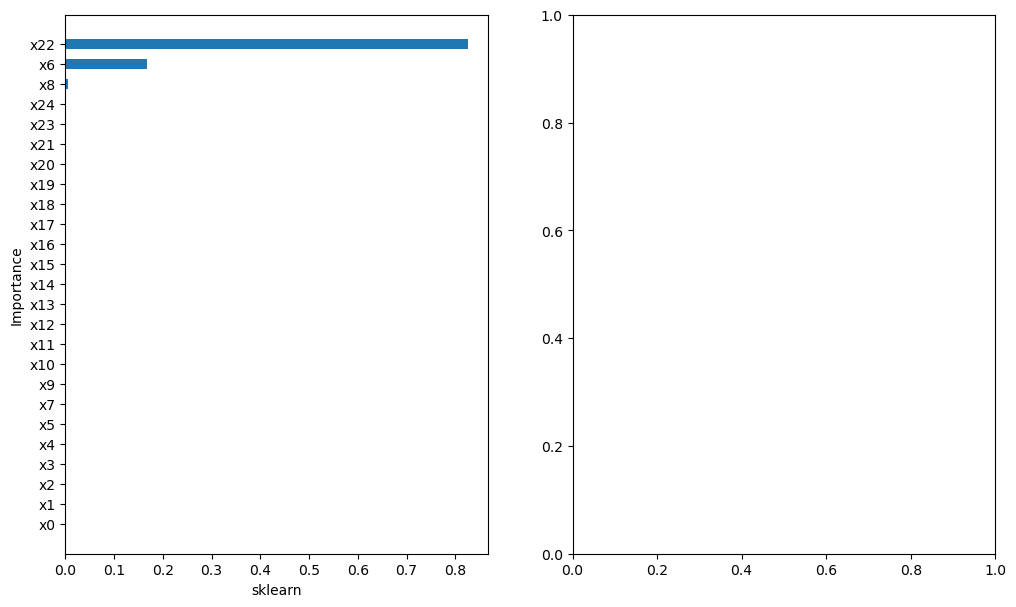

In [61]:
def plot_importance(importance, ax, x_label):
    temp1 = [f'x{i}' for i in range(len(importance))]
    temp2 = importance
    result = sorted(zip(temp1, temp2), key=lambda x:x[1])
    label = [x[0] for x in result]
    value = [x[1] for x in result]
    ax.barh(label, value, height=0.5)
    ax.set_xlabel(x_label)
    ax.set_ylabel('Importance')
 
fig, axs = plt.subplots(1, 2)
fig.set_facecolor('white')
fig.set_figwidth(12)
fig.set_figheight(7)
 
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
plot_importance(model.feature_importances_, ax1, 'sklearn')
my_importance = np.mean([feature_importance(est) for est in model.estimators_], axis=0)
plot_importance(my_importance, ax2, 'my importance')
plt.show()

##### killPlace랑 walkDistance